<hr/>

# Emergency 911 Calls - Exploratory Data Analysis
**[by Tomas Mantero](https://www.kaggle.com/tomasmantero)**
<hr/>

### Table of Contents
1. [Overview](#ch1)
1. [Dataset](#ch2)
1. [Creating New Features](#ch3)
1. [Exploratory Data Analysis (EDA)](#ch4)
1. [Overall 911 Emregency Calls](#ch5)
1. [Feature Engineering](#ch6)
1. [Heatmap](#ch7)
1. [Clustermap](#ch8)

<a id="ch1"></a>
## Overview 
<hr/>

One of the objectives of this notebook is to **show step-by-step how to analyze and visualize the dataset to better understand 911 calls and what originates them.** Moreover, we are going to explain most of the concepts used so that you understand why we are using them. 

If you have a question or feedback, do not hesitate to write and if you like this kernel,<b><font color='green'> please upvote! </font></b>

The following questions will be answered throughout the Kernel:
* ***Which features are available in the dataset?***
* ***How many rows and columns does the dataset have?***
* ***Which features are categorical?***
* ***Which features are numerical?***
* ***Which features contain blank, null or empty values?***
* ***What are the data types for various features?***
* ***How many zip codes does the dataset have?***
* ***What are the top 5 zip codes for 911 calls?***
* ***What are the top 5 townships (twp) for 911 calls?***
* ***How many unique title of emergency codes are there?***
* ***What is the most common Reason for a 911 call based off of this new column?***



<img src="https://images.pexels.com/photos/3584101/pexels-photo-3584101.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260" title="source: www.pexels.com" width="600" height="600"/>
<br>

<a id="ch2"></a>
## Dataset
<hr/>

* This dataset contains emergency calls from Montgomery County, PA. 
* It includes calls from 2015 to 2020. 

***Montgomery County***

Montgomery County, locally also referred to as Montco, is a county located in the Commonwealth of Pennsylvania. As of the 2010 census, the population was 799,874, making it the third-most populous county in Pennsylvania, after Philadelphia and Allegheny Counties. The county seat is Norristown. Montgomery County is very diverse, ranging from farms and open land in Upper Hanover to densely populated rowhouse streets in Cheltenham.

***911 Calls***

Created by Congress in 2004 as the 911 Implementation and Coordination Office (ICO), the National 911 Program is housed within the National Highway Traffic Safety Administration at the U.S. Department of Transportation and is a joint program with the National Telecommunication and Information Administration in the Department of Commerce.

***Feature Columns***
    
* **lat:** String variable, Latitude
* **lng:** String variable, Longitude
* **desc:** String variable, Description of the Emergency Call
* **zip:** String variable, ZIP Code
* **title:** String variable, Title of Emergency
* **timeStamp:** String variable, Date and time of the call, YYYY-MM-DD HH:MM:SS
* **twp:** String variable, Township
* **addr:** String variable, General Address
* **e:** String variable, Dummy variable, Index column (always 1)

### Imports

In [284]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Get the Data
The Python Pandas packages helps us work with our datasets. We start by acquiring the datasets into Pandas DataFrames.

In [285]:
df = pd.read_csv('C:/Users/Tomas/Desktop/Carpetas/Programación/Python/Kaggle/Emergency - 911 Calls/911.csv')

### Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.

***Which features are available in the dataset?***

In [286]:
print(df.columns.values)

['lat' 'lng' 'desc' 'zip' 'title' 'timeStamp' 'twp' 'addr' 'e']


***How many rows and columns does the dataset have?***

In [287]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])

Rows     : 663522
Columns  : 9


***Which features are categorical?***

* Categorical: desc, zipcode, title, twp, addr, e.

***Which features are numerical?***

* Continous: lat, lng.
* Discrete: timeStamp.

In [288]:
# preview the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Dropping column e

In [289]:
df = df.drop('e',axis=1)

***Which features contain blank, null or empty values?***

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column.
* There are 80492 missing values in the dataset. 
* For the purpose of this notebook it is not necessary to drop or fill the missing values, as we will only do a visual alanlizis.

In [290]:
# missing values
print('Missing values:',df.isnull().values.sum())

df.isnull().sum()

Missing values: 80492


lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
dtype: int64

***What are the data types for various features?***

Three features are floats and five are objects. 

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.5+ MB


***How many zip codes does the dataset have?***

In [293]:
df['zip'].nunique()

204

***What are the top 5 zip codes for 911 calls?***

In [294]:
df_zip = pd.DataFrame(df['zip'].value_counts().head(5))
df_zip.rename(columns = {'zip':'Top 5'}, inplace = True)
df_zip.style.background_gradient(cmap='Blues')

,Top 5
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464


**What are the top 5 townships (twp) for 911 calls?**

In [295]:
df_twp = pd.DataFrame(df['twp'].value_counts().head(5))
df_twp.rename(columns = {'twp':'Top 5'}, inplace = True)
df_twp.style.background_gradient(cmap='Greens')

,Top 5
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


***How many unique title of emergency codes are there?***

In [296]:
df['title'].nunique()

148

<a id="ch3"></a>
## Creating new features
<hr/>

### Reason feature
In the titles column there are "Reasons/Departments" specified before the title code. These are **EMS, Fire, and Traffic.** We are going to use `.apply()` with a custom lambda expression to create a new column called "Reason" that contains this string value.

For example, if the title column value is *EMS: BACK PAINS/INJURY* , the Reason column value would be *EMS.*

In [297]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

### Title_code feature
Using the same method from above, we are going to create a column with just the title code. 

In [298]:
df['title_code'] = df['title'].apply(lambda title: title.split(':')[1])

<a id="ch4"></a>
## Exploratory Data Analysis (EDA)
<hr/>

**What is the most common Reason for a 911 call based off of this new column?**
* The number one reason for 911 calls are Emergency Medical Services.
* Almost half of the reasons are for EMS.

In [300]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

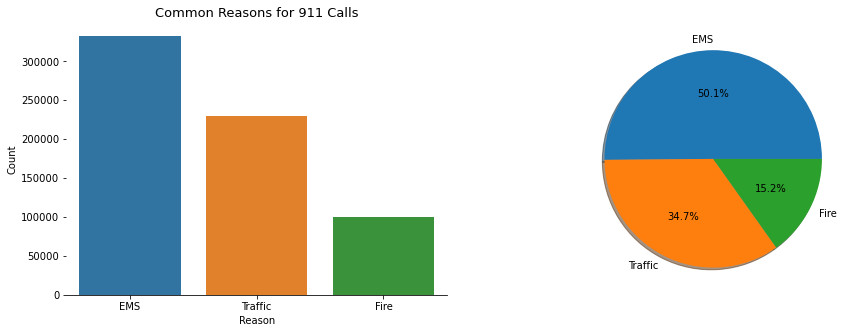

In [303]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

sns.countplot(x='reason', data=df, order=df['reason'].value_counts().index, ax=axes[0])
axes[0].set_title('Common Reasons for 911 Calls', size=13)
axes[0].set(xlabel='Reason', ylabel='Count')

df['reason'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1],shadow=True)
axes[1].set(xlabel='', ylabel='')

sns.despine(bottom=False, left=True)

<a id="ch5"></a>
## Overall 911 Emregency Calls
<hr/>

The barcahrt shows the **top 10 emergency calls** from all the categories.
* Vehicle accidents are the number one reason people call 911. 
* Disabled vehicle and fire alarm are in second and third place. 

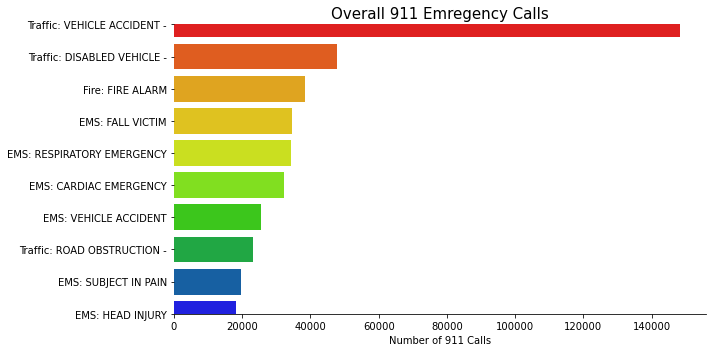

In [312]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(y='title', data=df, order=df['title'].value_counts().index, palette='prism')
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Overall 911 Emregency Calls', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()

### Traffic 911 Emergency Calls
* The most common emergency titles are vehicle accident, disable vehicle and road obstruction.

Text(0.5, 1.0, 'Traffic 911 Emergency Calls')

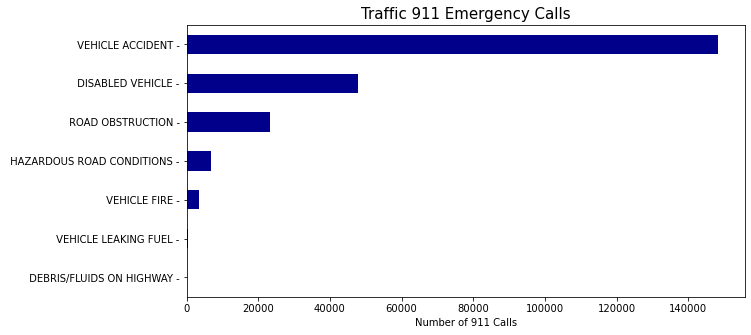

In [331]:
df[df['reason']=='Traffic'].groupby('title_code').count()['lat'].sort_values(ascending=True).plot(kind='barh', figsize=(10, 5), color='darkblue')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Traffic 911 Emergency Calls', fontsize=15)

### Fire 911 Emergency Calls
* The most common emergency titles are fire alarm, vehicle accident and fire investigation.

Text(0.5, 1.0, 'Fire 911 Emergency Calls')

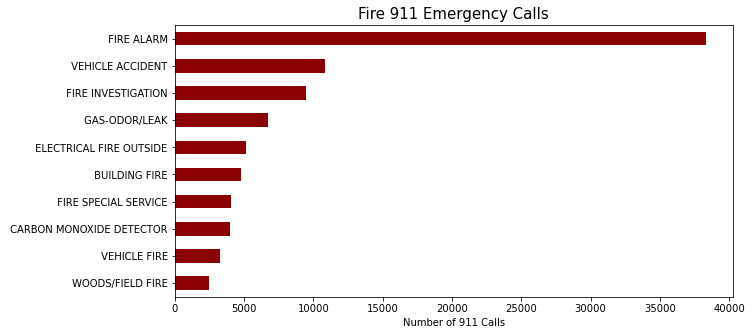

In [332]:
df[df['reason']=='Fire'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkred')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Fire 911 Emergency Calls', fontsize=15)

### EMS 911 Emergency Calls
* The most common emergency titles are fall victim, respiratory emergency and cardiac emergency.

Text(0.5, 1.0, 'EMS 911 Emergency Calls')

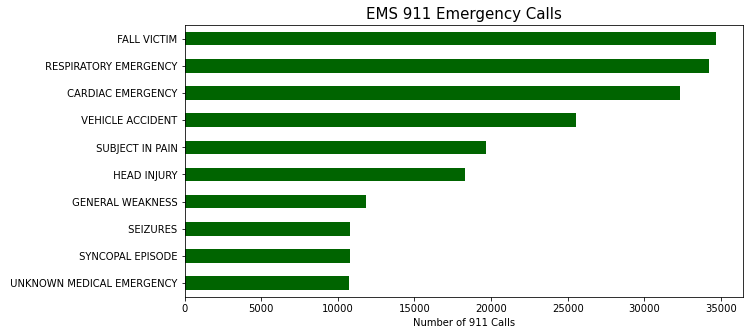

In [333]:
df[df['reason']=='EMS'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkgreen')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('EMS 911 Emergency Calls', fontsize=15)

<a id="ch6"></a>
## Feature Engineering
<hr/>

### TimeStamp feature
We are going to use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the timeStamp column from string to DateTime object. Then we use `.apply()` to create 3 new columns called Hour, Month, and Day of Week.

In [334]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

Notice how the Day of Week is an integer 0-6. Let's map the actual string names to the day of the week:

In [335]:
# dictionary string names
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)

###  Weekly and monthly calls
* It looks like friday is the day with more calls during the week. 
* Regarding the monthly calls, looks like during the first semester there are more calls.

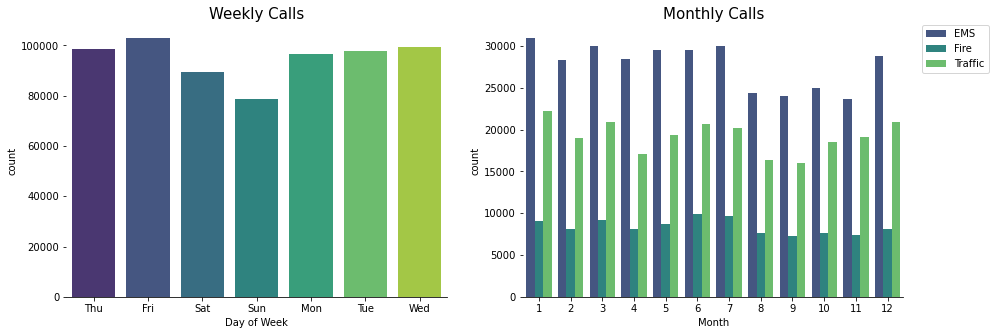

In [336]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='Day of Week', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Weekly Calls', size=15)

sns.countplot(x='Month', data=df, hue='reason', palette='viridis', ax=axes[1])
axes[1].set_title('Monthly Calls', size=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

sns.despine(bottom=False, left=True)

### Date feature
Create a new column called 'Date' that contains the date from the timeStamp column.

In [337]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls by reason.

### Traffic

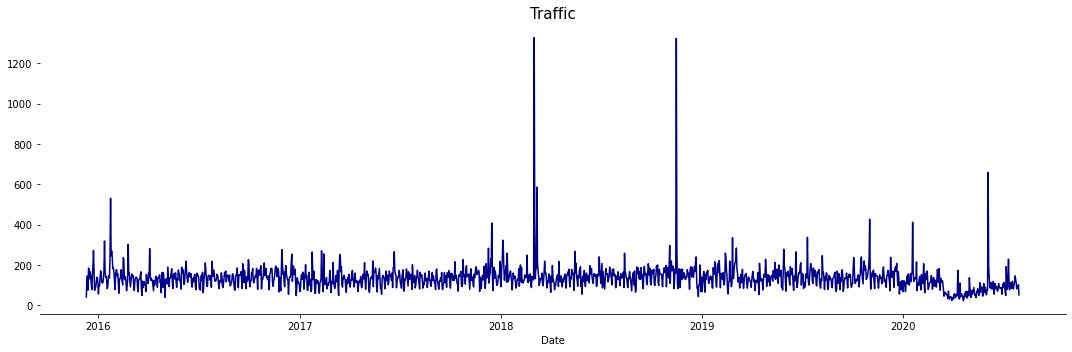

In [339]:
df[df['reason']=='Traffic'].groupby('Date').count()['lat'].plot(figsize=(15,5), color='darkblue')
plt.title('Traffic', fontsize=15)
sns.despine(bottom=False, left=True)
plt.tight_layout()

### Fire

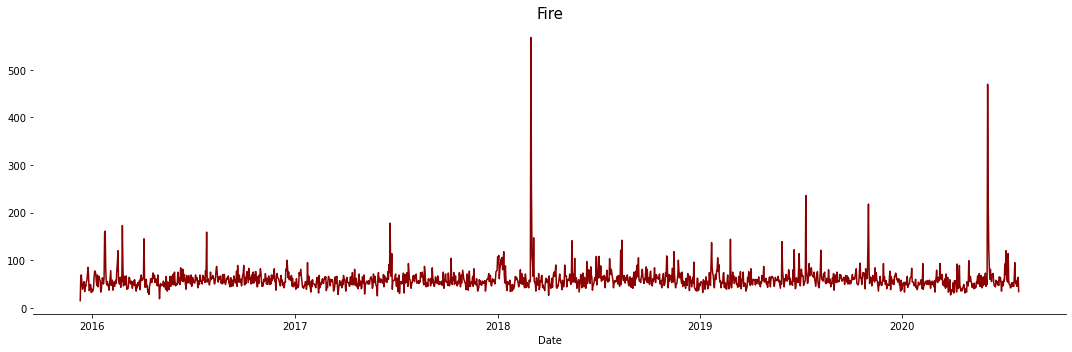

In [340]:
df[df['reason']=='Fire'].groupby('Date').count()['lat'].plot(figsize=(15,5), color='darkred')
plt.title('Fire', fontsize=15)
sns.despine(bottom=False, left=True)
plt.tight_layout()

### EMS

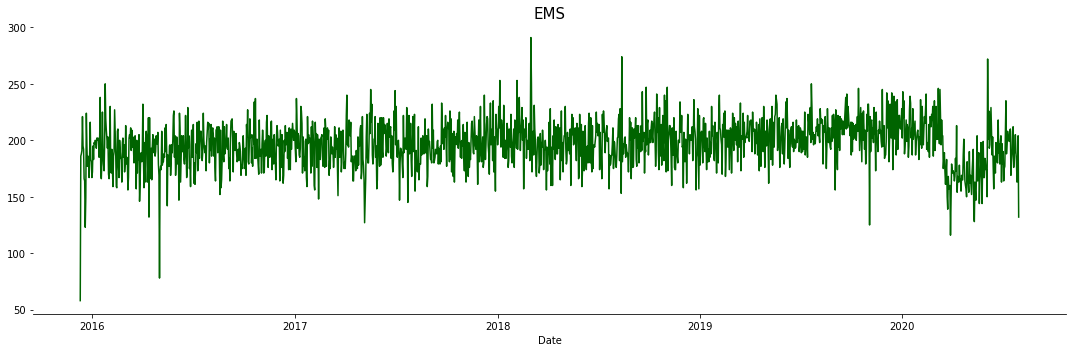

In [341]:
df[df['reason']=='EMS'].groupby('Date').count()['lat'].plot(figsize=(15,5), color='darkgreen')
plt.title('EMS', fontsize=15)
sns.despine(bottom=False, left=True)
plt.tight_layout()

<a id="ch7"></a>
## Heatmap
<hr/>
Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method.
* In the heatmap we can see that during 14:00 and 17:00 hours there are more calls. 
* Friday and Wednesday have more calls.
* Apparently during Sunday the calls drop.

In [ ]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

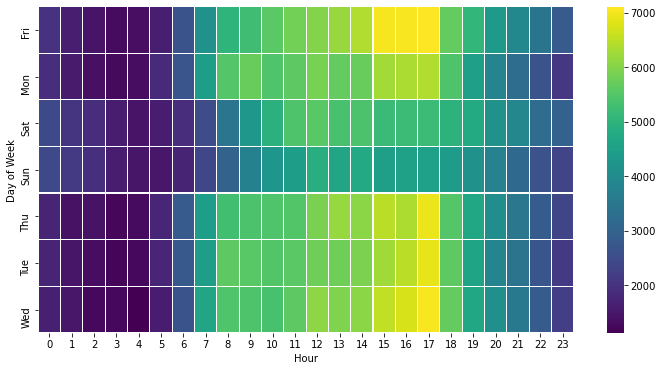

In [349]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis', linewidths=0.05)

<a id="ch8"></a>
## Clustermap
<hr/>

<Figure size 864x432 with 0 Axes>

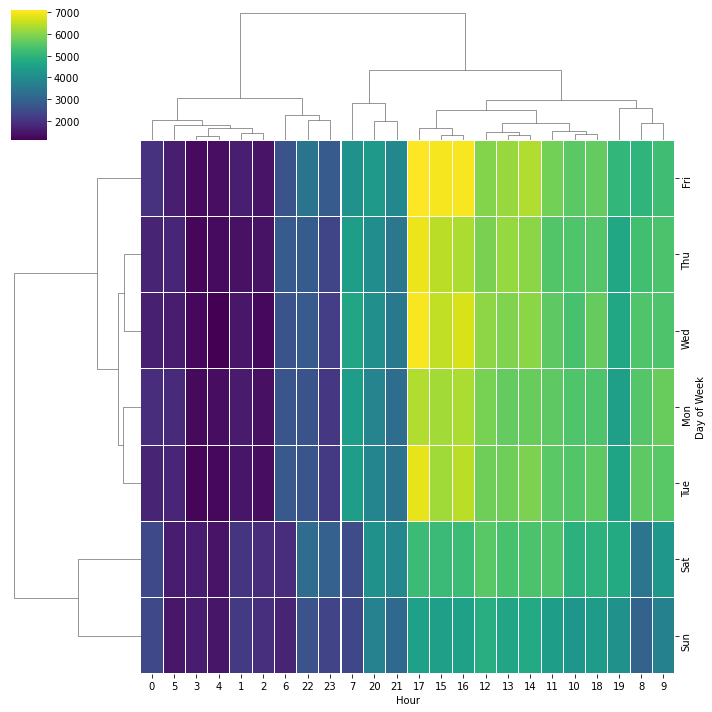

In [258]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour, cmap='viridis', linewidths=0.05)

## References
---
* [An Introduction to Statistical Learning with Applications in R](http://faculty.marshall.usc.edu/gareth-james/ISL/) - This book provides an introduction to statistical learning methods.
* [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) - Use Python for Data Science and Machine Learning.

**Thank you** for taking the time to read through my first exploration of a Kaggle dataset. I look forward to doing more!

If you have a question or feedback, do not hesitate to comment and if you like this kernel,<b><font color='green'> please upvote! </font></b>